In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nyc-parking-tickets/Parking_Violations_Issued_-_Fiscal_Year_2017.csv
/kaggle/input/nyc-parking-tickets/Parking_Violations_Issued_-_Fiscal_Year_2016.csv
/kaggle/input/nyc-parking-tickets/Parking_Violations_Issued_-_Fiscal_Year_2014__August_2013___June_2014_.csv
/kaggle/input/nyc-parking-tickets/Parking_Violations_Issued_-_Fiscal_Year_2015.csv


In [2]:
df=pd.read_csv("/kaggle/input/nyc-parking-tickets/Parking_Violations_Issued_-_Fiscal_Year_2014__August_2013___June_2014_.csv")

/tmp/ipykernel_24/2669269918.py:1: DtypeWarning: Columns (17,18,20,21,22,23,29,30,31,32,36,38,39) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("/kaggle/input/nyc-parking-tickets/Parking_Violations_Issued_-_Fiscal_Year_2014__August_2013___June_2014_.csv")


In [3]:
import pandas as pd
import numpy as np


# 1. Handling Missing Data (NaN Values)
# Replace NaN with 0 for numeric columns (e.g., 'Feet From Curb', 'Meter Number')
df['Feet From Curb'] = df['Feet From Curb'].fillna(0)
df['Meter Number'] = df['Meter Number'].fillna(0)

# Replace NaN in categorical columns with 'Unknown' or other suitable placeholder
df['Vehicle Make'] = df['Vehicle Make'].fillna('Unknown')
df['Violation Description'] = df['Violation Description'].fillna('Unknown')

# 2. Correct Data Types
# Convert 'Issue Date' to datetime type
df['Issue Date'] = pd.to_datetime(df['Issue Date'], errors='coerce')
df['year'] = df['Issue Date'].dt.year
df['month'] = df['Issue Date'].dt.month

# Convert 'Vehicle Year' and other numerical columns to proper numeric types
df['Vehicle Year'] = pd.to_numeric(df['Vehicle Year'], errors='coerce')
df['Feet From Curb'] = pd.to_numeric(df['Feet From Curb'], errors='coerce')

# Convert categorical columns to 'category' type for optimization
df['Plate Type'] = df['Plate Type'].astype('category')
df['Violation Code'] = df['Violation Code'].astype('int64')
df['Vehicle Body Type'] = df['Vehicle Body Type'].astype('category')
df['Issuing Agency'] = df['Issuing Agency'].astype('category')

# 3. Handle Duplicates
# Remove any duplicate rows
df.drop_duplicates(inplace=True)

# 4. Fix Inconsistent Data
# Standardize categorical columns like 'Vehicle Make', 'Violation Description' (e.g., to lowercase)
df['Vehicle Make'] = df['Vehicle Make'].str.lower()
df['Violation Description'] = df['Violation Description'].str.lower()

# Handle boolean-like columns ('Unregistered Vehicle?', 'No Standing or Stopping Violation', etc.)
# Replace 'True'/'False' strings with actual boolean values
boolean_columns = ['Unregistered Vehicle?', 'No Standing or Stopping Violation', 'Hydrant Violation', 'Double Parking Violation']
for col in boolean_columns:
    if col in df.columns:
        df[col] = df[col].map({'True': True, 'False': False})
        df[col] = df[col].fillna(False)  # Fill NaN with False for boolean columns

# 5. Fix Outliers (Optional)
# For numerical columns, you may want to handle outliers, e.g., remove values like '9999' for vehicle year
df['Vehicle Year'] = df['Vehicle Year'].replace(9999, np.nan)
df['Vehicle Year'] = df['Vehicle Year'].fillna(df['Vehicle Year'].median())

# 6. Final Inspection
# Check the cleaned dataset
df.head()

/tmp/ipykernel_24/3795344384.py:45: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].fillna(False)  # Fill NaN with False for boolean columns
/tmp/ipykernel_24/3795344384.py:45: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].fillna(False)  # Fill NaN with False for boolean columns
/tmp/ipykernel_24/3795344384.py:45: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set 

,Summons Number,Plate ID,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Issuing Agency,Street Code1,...,Latitude,Longitude,Community Board,Community Council,Census Tract,BIN,BBL,NTA,year,month
0,1283294138,GBB9093,NY,PAS,2013-08-04,46,SUBN,audi,P,37250,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013,8
1,1283294151,62416MB,NY,COM,2013-08-04,46,VAN,ford,P,37290,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013,8
2,1283294163,78755JZ,NY,COM,2013-08-05,46,P-U,chevr,P,37030,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013,8
3,1283294175,63009MA,NY,COM,2013-08-05,46,VAN,ford,P,37270,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013,8
4,1283294187,91648MC,NY,COM,2013-08-08,41,TRLR,gmc,P,37240,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013,8


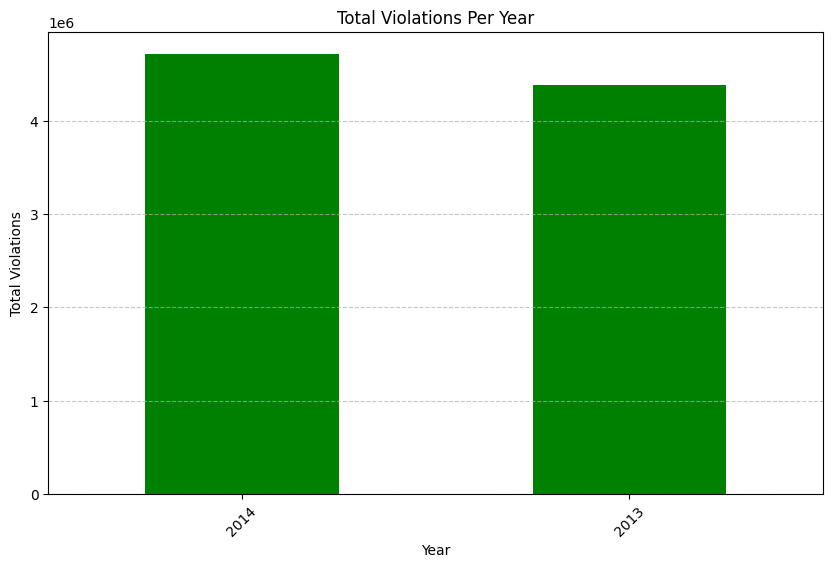

In [4]:
import matplotlib.pyplot as plt

violations_per_year = df.groupby('year')['Violation Code'].count().sort_values(ascending=False).head(2)

# Plotting
plt.figure(figsize=(10, 6))
violations_per_year.plot(kind='bar', color='green')
plt.title('Total Violations Per Year')
plt.xlabel('Year')
plt.ylabel('Total Violations')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

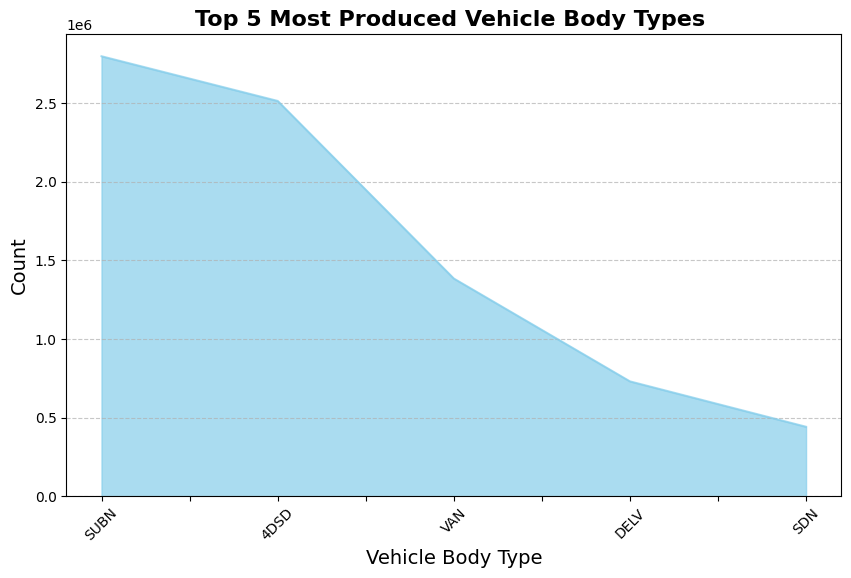

In [5]:
top_5_vehicle_types = df['Vehicle Body Type'].value_counts().head(5)

# Step 2: Create a stacked area chart
top_5_vehicle_types.plot(kind='area', figsize=(10, 6), color='skyblue', alpha=0.7)

plt.title('Top 5 Most Produced Vehicle Body Types ', fontsize=16, fontweight='bold')
plt.xlabel('Vehicle Body Type', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

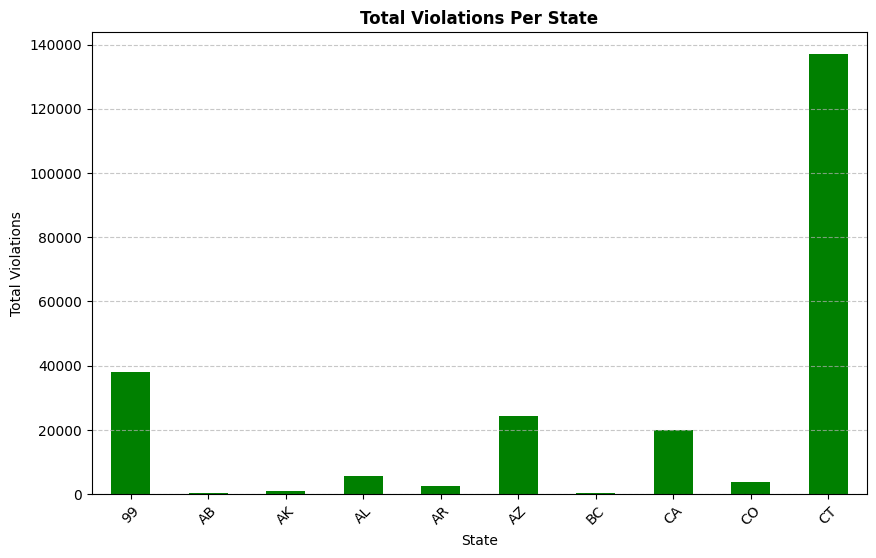

In [6]:
import matplotlib.pyplot as plt

violations_per_state = df.groupby('Registration State')['Violation Code'].count().head(10)

# Plotting
plt.figure(figsize=(10, 6))
violations_per_state.plot(kind='bar', color='green')
plt.title('Total Violations Per State', fontweight='bold')
plt.xlabel('State')
plt.ylabel('Total Violations')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

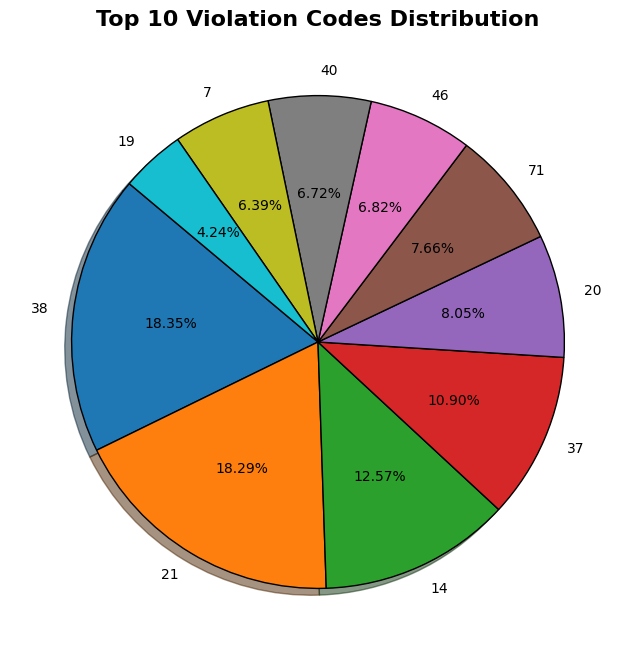

In [7]:
import matplotlib.pyplot as plt

violation_counts = df['Violation Code'].value_counts()

top_violation_codes = violation_counts.head(10)

plt.figure(figsize=(8, 8))
plt.pie(
    top_violation_codes, 
    labels=top_violation_codes.index,  
    autopct='%.2f%%', 
    startangle=140,
    shadow=True, 
    wedgeprops={'edgecolor': 'black', 'linewidth': 1}
)

plt.title('Top 10 Violation Codes Distribution', fontsize=16, fontweight='bold')

plt.show()


/tmp/ipykernel_24/1478081840.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x, rotation=90)
/tmp/ipykernel_24/1478081840.py:24: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


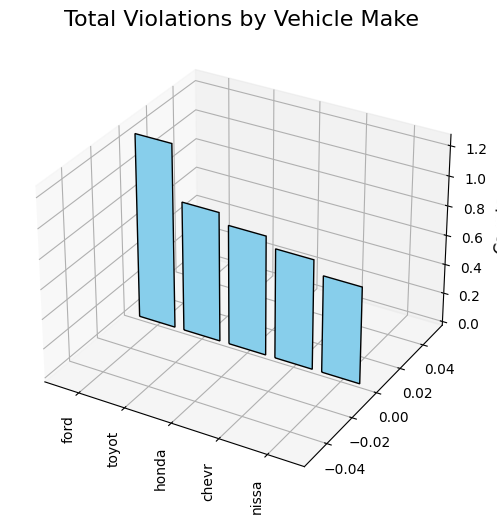

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

# Group the data by 'Vehicle Make' and count violations
violations_by_make = df.groupby('Vehicle Make')['Violation Code'].count().sort_values(ascending=False).head(5)

# Prepare for 3D plotting
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection='3d')

# Data for the bar chart
x = violations_by_make.index  # Vehicle Makes
y = violations_by_make.values  # Number of Violations

# Create a bar chart in 3D
ax.bar(x, y, zs=0, zdir='y', color='skyblue', edgecolor='black')

ax.set_title('Total Violations by Vehicle Make', fontsize=16)
ax.set_zlabel('Counts', fontsize=12)

ax.set_xticklabels(x, rotation=90)

plt.tight_layout()

plt.show()


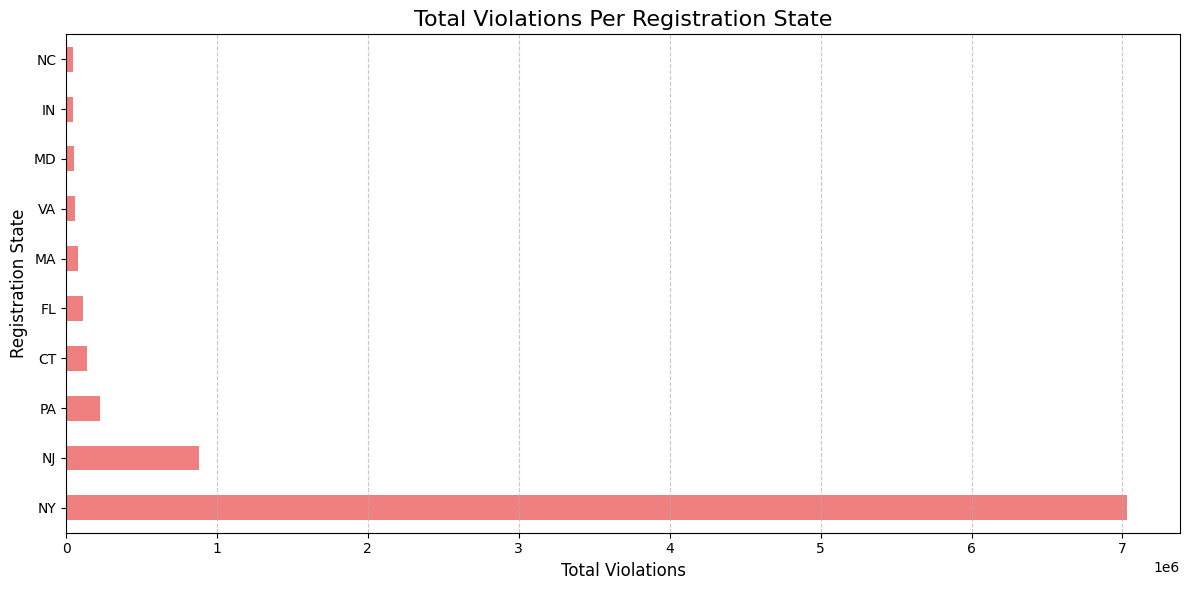

In [9]:
import matplotlib.pyplot as plt

# Horizontal bar chart for better readability of state names
violations_per_states = df.groupby('Registration State')['Violation Code'].count().sort_values(ascending=False).head(10)


plt.figure(figsize=(12, 6))
violations_per_states.plot(kind='barh', color='lightcoral')

# Adding labels and title
plt.title('Total Violations Per Registration State', fontsize=16)
plt.xlabel('Total Violations', fontsize=12)
plt.ylabel('Registration State', fontsize=12)

# Display grid lines for the x-axis
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


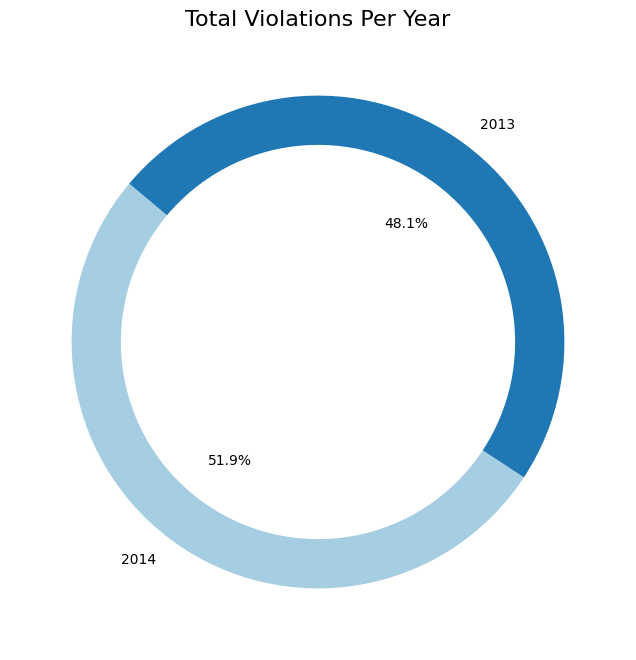

In [10]:
import matplotlib.pyplot as plt

# Grouping by 'year' and counting the number of occurrences of 'Violation Code'
violations_per_year = df.groupby('year')['Violation Code'].count().sort_values(ascending=False).head(2)

# Plotting as a donut chart
plt.figure(figsize=(8, 8))
plt.pie(
    violations_per_year, 
    labels=violations_per_year.index,  # Use the years as labels
    autopct='%1.1f%%',  # Show percentage
    startangle=140,  # Start angle for the first wedge
    wedgeprops={'width': 0.2},  # Makes it a donut chart by creating a hole
    colors=plt.cm.Paired.colors 
)

# Adding title
plt.title('Total Violations Per Year', fontsize=16)

# Show the plot
plt.show()


<Figure size 1400x800 with 0 Axes>

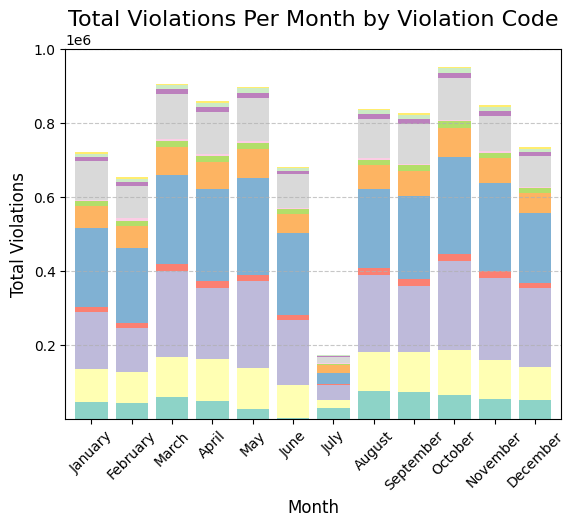

In [11]:
import matplotlib.pyplot as plt
import calendar

violations_per_month_code = df.groupby(['month', 'Violation Code']).size().unstack(fill_value=0)

month_names = [calendar.month_name[i] for i in violations_per_month_code.index]

plt.figure(figsize=(14, 8)) 
violations_per_month_code.plot(kind='bar', stacked=True, colormap='Set3', width=0.8, legend=False)

plt.xticks(ticks=range(len(month_names)), labels=month_names, rotation=45, fontsize=10)

plt.title('Total Violations Per Month by Violation Code', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Violations', fontsize=12)

# Display grid lines for the y-axis
plt.grid(axis='y', linestyle='--', alpha=0.7)


# Show the plot
plt.show()
